In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data/NYC_Inspection_data.csv")

## 1. Basic Structure & Metadata
Understanding the dataset’s dimensions, columns, and data types.

In [27]:
# --- 1.1 High-level shape of the data ---

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Peek at the first few rows
print("\nSample of the data (head):")
display(df.head())

# --- 1.2 Column names and types ---

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

# Info summary: non-null counts + dtypes
print("\nDataFrame info:")
df.info()


Number of rows: 103426
Number of columns: 26

Sample of the data (head):


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41647571,PEKING GARDEN,Manhattan,3163,BROADWAY,10027,2128653600,Chinese,2/1/2022,Violations were cited in the following area(s).,...,5/14/2023,Cycle Inspection / Re-inspection,40.814647,-73.959057,109,7,21100,1059858,1019930092,MN09
1,50128737,BAO BY KAYA,Manhattan,570,LEXINGTON AVENUE,10022,9294219987,Asian/Asian Fusion,11/18/2022,Violations were cited in the following area(s).,...,5/14/2023,Pre-permit (Operational) / Re-inspection,40.756918,-73.972066,105,4,10000,1036459,1013050060,MN19
2,40510804,WOODROW DINER,Staten Island,655,ROSSVILLE AVENUE,10309,7186054031,American,3/5/2020,Violations were cited in the following area(s).,...,5/14/2023,Cycle Inspection / Re-inspection,40.542592,-74.208331,503,51,20801,5079747,5061450300,SI32
3,50077566,JANE FAST FOOD,Queens,8622,BROADWAY,11373,6463066186,Chinese,2/21/2020,Violations were cited in the following area(s).,...,5/14/2023,Cycle Inspection / Re-inspection,40.738040,-73.877234,404,25,47300,4038767,4015490020,QN29
4,50110452,GREENHOUSE CAFE RBNY,Queens,10810,ROCKAWAY BEACH DR,11694,7184898938,Coffee/Tea,12/1/2021,No violations were recorded at the time of thi...,...,5/14/2023,Pre-permit (Operational) / Re-inspection,40.581404,-73.829873,414,32,93800,4000000,4161800001,QN10



Column names:
['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA']

Data types:
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                    int64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64

## 2. Checking for Missing Data
Looking for any missing information in our dataset and checking if there are any duplicate records.

In [ ]:
# --- 2.1 Missing values by column ---

print("\nMissing values per column (count):")
missing_counts = df.isna().sum().sort_values(ascending=False)
print(missing_counts)

print("\nMissing values per column (percentage):")
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct.round(2))

# --- 2.2 Check for duplicate rows ---

num_duplicates = df.duplicated().sum()
print(f"\nNumber of completely duplicate rows: {num_duplicates}")


Missing values per column (count):
GRADE DATE               14092
BIN                        545
SCORE                       50
BORO                         0
STREET                       0
ZIPCODE                      0
PHONE                        0
BUILDING                     0
CAMIS                        0
DBA                          0
ACTION                       0
INSPECTION DATE              0
CUISINE DESCRIPTION          0
VIOLATION DESCRIPTION        0
CRITICAL FLAG                0
GRADE                        0
RECORD DATE                  0
VIOLATION CODE               0
INSPECTION TYPE              0
Latitude                     0
Community Board              0
Longitude                    0
Council District             0
Census Tract                 0
BBL                          0
NTA                          0
dtype: int64

Missing values per column (percentage):
GRADE DATE               13.63
BIN                       0.53
SCORE                     0.05
BORO       

## 3. Basic Statistics
Calculating simple statistics like averages, minimums, and maximums for our data.

In [29]:
# --- 3.1 Statistics for Numerical Columns (Numbers) ---

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical columns (columns with numbers):", numeric_cols)

if numeric_cols:
    print("\nBasic Statistics for Numerical Columns:")
    print("(Shows count, mean, min, max, etc.)")
    display(df[numeric_cols].describe().T)
else:
    print("No numerical columns found.")

# --- 3.2 Statistics for Categorical Columns (Text) ---

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nCategorical columns (columns with text/categories):", cat_cols[:10], "...")  # Show first 10

if cat_cols:
    print("\nBasic Statistics for Categorical Columns:")
    print("(Shows count, unique values, most common, etc.)")
    display(df[cat_cols].describe().T)
else:
    print("No categorical columns found.")



Numerical columns (columns with numbers): ['CAMIS', 'ZIPCODE', 'SCORE', 'Latitude', 'Longitude']

Basic Statistics for Numerical Columns:
(Shows count, mean, min, max, etc.)


,count,mean,std,min,25%,50%,75%,max
CAMIS,103426.0,4.722122e+07,4.166598e+06,3.007544e+07,4.158212e+07,5.005295e+07,5.009694e+07,5.013579e+07
ZIPCODE,103426.0,1.070797e+04,5.930358e+02,1.000000e+04,1.002400e+04,1.110100e+04,1.123100e+04,1.234500e+04
SCORE,103376.0,1.775349e+01,1.669325e+01,0.000000e+00,9.000000e+00,1.200000e+01,2.100000e+01,1.570000e+02
Latitude,103426.0,4.072656e+01,6.906549e-02,4.049956e+01,4.068432e+01,4.073161e+01,4.076170e+01,4.091282e+01
Longitude,103426.0,-7.394155e+01,7.658666e-02,-7.424871e+01,-7.398908e+01,-7.395753e+01,-7.389960e+01,-7.370093e+01



Categorical columns (columns with text/categories): ['DBA', 'BORO', 'BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION'] ...

Basic Statistics for Categorical Columns:
(Shows count, unique values, most common, etc.)


,count,unique,top,freq
DBA,103426,18930,DUNKIN,1658
BORO,103426,5,Manhattan,37846
BUILDING,103426,6975,1,698
STREET,103426,2091,BROADWAY,3887
PHONE,103426,22145,9176186310,138
CUISINE DESCRIPTION,103426,87,American,18459
INSPECTION DATE,103426,1420,11/28/2022,416
ACTION,103426,5,Violations were cited in the following area(s).,94349
VIOLATION CODE,103426,95,10F,19441
VIOLATION DESCRIPTION,103426,164,Non-food contact surface improperly constructe...,10970


## 4. Visualizations
Creating charts and graphs to better understand our data.


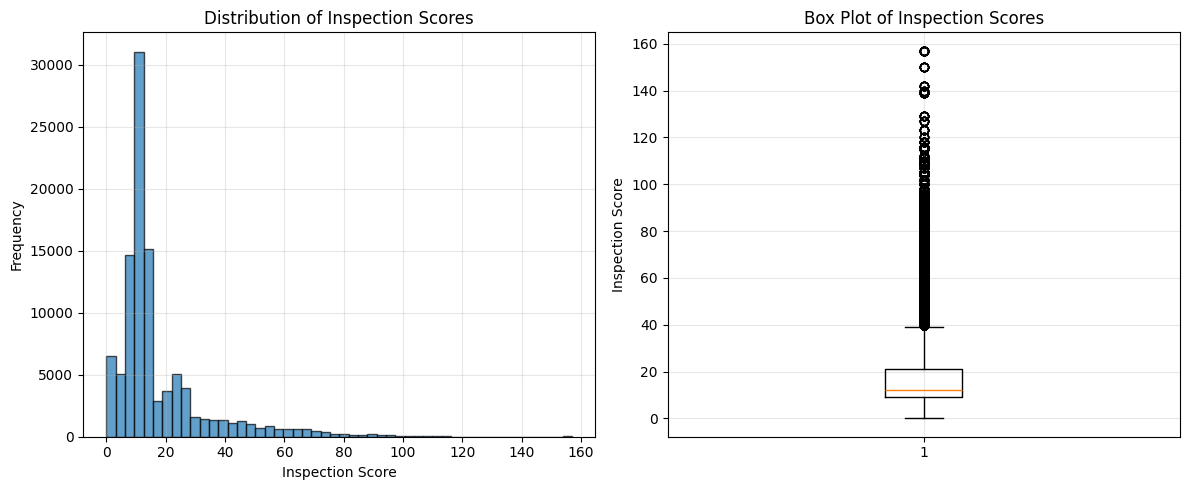


Score Statistics:
count    103376.000000
mean         17.753492
std          16.693250
min           0.000000
25%           9.000000
50%          12.000000
75%          21.000000
max         157.000000
Name: SCORE, dtype: float64


In [32]:
# --- 4.1 Distribution of Inspection Scores ---

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['SCORE'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.title('Distribution of Inspection Scores')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['SCORE'].dropna())
plt.ylabel('Inspection Score')
plt.title('Box Plot of Inspection Scores')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nScore Statistics:")
print(df['SCORE'].describe())


In [ ]:
# --- 4.2 Grade Distribution ---

grade_counts = df['GRADE'].value_counts().sort_index()
print("\nGrade Distribution:")
print(grade_counts)
print(f"\nGrade Percentages:")
print((grade_counts / len(df) * 100).round(2))

plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Inspection Grades')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# --- 4.3 Violations by Borough ---

boro_counts = df['BORO'].value_counts()
print("\nInspections by Borough:")
print(boro_counts)
print(f"\nBorough Percentages:")
print((boro_counts / len(df) * 100).round(2))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
boro_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Borough')
plt.ylabel('Number of Inspections')
plt.title('Number of Inspections by Borough')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
avg_score_by_boro = df.groupby('BORO')['SCORE'].mean().sort_values()
avg_score_by_boro.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.xlabel('Average Inspection Score')
plt.ylabel('Borough')
plt.title('Average Inspection Score by Borough')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [ ]:
# --- 4.4 Top Cuisine Types ---

top_cuisines = df['CUISINE DESCRIPTION'].value_counts().head(15)
print("\nTop 15 Cuisine Types:")
print(top_cuisines)

plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='barh', color='mediumpurple', edgecolor='black')
plt.xlabel('Number of Inspections')
plt.ylabel('Cuisine Type')
plt.title('Top 15 Cuisine Types by Number of Inspections')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# --- 4.5 Critical Flag Analysis ---

critical_flag_counts = df['CRITICAL FLAG'].value_counts()
print("\nCritical Flag Distribution:")
print(critical_flag_counts)
print(f"\nCritical Flag Percentages:")
print((critical_flag_counts / len(df) * 100).round(2))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
critical_flag_counts.plot(kind='bar', color=['red', 'green', 'orange'], edgecolor='black')
plt.xlabel('Critical Flag')
plt.ylabel('Count')
plt.title('Distribution of Critical Flags')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
avg_score_by_flag = df.groupby('CRITICAL FLAG')['SCORE'].mean().sort_values()
avg_score_by_flag.plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('Average Inspection Score')
plt.ylabel('Critical Flag')
plt.title('Average Score by Critical Flag Status')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [ ]:
# --- 4.6 Inspection Type Analysis ---

inspection_type_counts = df['INSPECTION TYPE'].value_counts()
print("\nInspection Type Distribution:")
print(inspection_type_counts)
print(f"\nInspection Type Percentages:")
print((inspection_type_counts / len(df) * 100).round(2))

plt.figure(figsize=(12, 6))
inspection_type_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Inspection Type')
plt.ylabel('Count')
plt.title('Distribution of Inspection Types')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# --- 4.7 Action Type Analysis ---

action_counts = df['ACTION'].value_counts().head(10)
print("\nTop 10 Action Types:")
print(action_counts)

plt.figure(figsize=(12, 6))
action_counts.plot(kind='barh', color='gold', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Action Type')
plt.title('Top 10 Action Types')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# --- 4.8 Score Range Analysis ---

# Find the minimum and maximum scores
min_score = df['SCORE'].min()
max_score = df['SCORE'].max()

print(f"\nScore Range Analysis:")
print(f"Lowest score: {min_score:.0f}")
print(f"Highest score: {max_score:.0f}")
print(f"Score range: {max_score - min_score:.0f} points")

# Count how many restaurants got very low scores (below 20) or very high scores (above 80)
low_scores = len(df[df['SCORE'] < 20])
high_scores = len(df[df['SCORE'] > 80])
print(f"\nRestaurants with scores below 20: {low_scores} ({low_scores/len(df)*100:.2f}%)")
print(f"Restaurants with scores above 80: {high_scores} ({high_scores/len(df)*100:.2f}%)")



Score Range Analysis:
Lowest score: 0
Highest score: 157
Score range: 157 points

Restaurants with scores below 20: 76316 (73.79%)
Restaurants with scores above 80: 1118 (1.08%)


## 5. Relationships Between Variables
Looking at how different variables relate to each other.


In [ ]:
# --- 5.1 How Scores Relate to Grades ---

# Calculate average score for each grade
grade_score_avg = df.groupby('GRADE')['SCORE'].mean().sort_index()
print("\nAverage Score by Grade:")
for grade, avg_score in grade_score_avg.items():
    print(f"  Grade {grade}: {avg_score:.2f}")

plt.figure(figsize=(10, 6))
grade_score_avg.plot(kind='bar', color='darkblue', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Average Score')
plt.title('Average Inspection Score by Grade')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# --- 5.2 Average Scores by Cuisine Type ---

# Look at top 10 most common cuisine types and their average scores
top_cuisines_list = df['CUISINE DESCRIPTION'].value_counts().head(10).index
df_top_cuisines = df[df['CUISINE DESCRIPTION'].isin(top_cuisines_list)]

cuisine_scores = df_top_cuisines.groupby('CUISINE DESCRIPTION')['SCORE'].mean().sort_values()
print("\nAverage Scores for Top 10 Cuisine Types:")
for cuisine, score in cuisine_scores.items():
    print(f"  {cuisine}: {score:.2f}")

plt.figure(figsize=(12, 6))
cuisine_scores.plot(kind='barh', color='indigo', edgecolor='black')
plt.xlabel('Average Score')
plt.ylabel('Cuisine Type')
plt.title('Average Inspection Score by Top 10 Cuisine Types')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## 6. Trends Over Time
Looking at how inspections and scores change over the years.


In [ ]:
# --- 6.1 Inspections and Scores Over Time ---

# Convert date column to datetime format
try:
    df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], errors='coerce')
    
    # Extract the year from the inspection date
    df['INSPECTION_YEAR'] = df['INSPECTION DATE'].dt.year
    
    print("Date conversion successful!")
    print(f"\nDate Range: {df['INSPECTION DATE'].min()} to {df['INSPECTION DATE'].max()}")
    
    # Count inspections by year
    inspections_by_year = df['INSPECTION_YEAR'].value_counts().sort_index()
    print(f"\nNumber of Inspections by Year:")
    for year, count in inspections_by_year.items():
        print(f"  {int(year)}: {count:,} inspections")
    
    # Plot inspections by year
    plt.figure(figsize=(12, 5))
    inspections_by_year.plot(kind='bar', color='navy', edgecolor='black')
    plt.xlabel('Year')
    plt.ylabel('Number of Inspections')
    plt.title('Number of Inspections by Year')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Calculate average score by year
    avg_score_by_year = df.groupby('INSPECTION_YEAR')['SCORE'].mean()
    print(f"\nAverage Score by Year:")
    for year, score in avg_score_by_year.items():
        print(f"  {int(year)}: {score:.2f}")
    
    # Plot average score over time
    plt.figure(figsize=(10, 6))
    avg_score_by_year.plot(kind='line', marker='o', color='crimson', linewidth=2, markersize=8)
    plt.xlabel('Year')
    plt.ylabel('Average Score')
    plt.title('Average Inspection Score by Year')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error processing dates: {e}")
    print("Please check the date format in your dataset.")


## 7. Summary of Key Findings
Main takeaways from exploring the data.


In [ ]:
# --- 7.1 Summary of Main Findings ---

print("=" * 70)
print("SUMMARY OF KEY FINDINGS")
print("=" * 70)

print(f"\n1. DATASET SIZE:")
print(f"   - Total restaurant inspections: {len(df):,}")
print(f"   - Number of columns (features): {df.shape[1]}")

print(f"\n2. INSPECTION SCORES:")
print(f"   - Average score: {df['SCORE'].mean():.2f}")
print(f"   - Lowest score: {df['SCORE'].min():.0f}")
print(f"   - Highest score: {df['SCORE'].max():.0f}")

print(f"\n3. GRADE DISTRIBUTION:")
grade_dist = df['GRADE'].value_counts()
for grade, count in grade_dist.items():
    pct = (count / len(df)) * 100
    print(f"   - Grade {grade}: {count:,} restaurants ({pct:.1f}%)")

print(f"\n4. MOST INSPECTED BOROUGHS:")
top_3_boros = df['BORO'].value_counts().head(3)
for boro, count in top_3_boros.items():
    pct = (count / len(df)) * 100
    print(f"   - {boro}: {count:,} inspections ({pct:.1f}%)")

print(f"\n5. CRITICAL FLAGS:")
critical_dist = df['CRITICAL FLAG'].value_counts()
for flag, count in critical_dist.items():
    pct = (count / len(df)) * 100
    print(f"   - {flag}: {count:,} ({pct:.1f}%)")

print(f"\n6. MOST COMMON CUISINE TYPES:")
top_3_cuisines = df['CUISINE DESCRIPTION'].value_counts().head(3)
for cuisine, count in top_3_cuisines.items():
    pct = (count / len(df)) * 100
    print(f"   - {cuisine}: {count:,} ({pct:.1f}%)")

print("\n" + "=" * 70)


## 8. Correlation Analysis
Looking at how numerical variables are related to each other.


Correlation matrix (numeric features):


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude
CAMIS,1.000000,0.048632,0.100389,-0.020918,0.021659
ZIPCODE,0.048632,1.000000,0.041103,-0.412129,0.509700
SCORE,0.100389,0.041103,1.000000,0.005253,0.042868
Latitude,-0.020918,-0.412129,0.005253,1.000000,0.365395
Longitude,0.021659,0.509700,0.042868,0.365395,1.000000


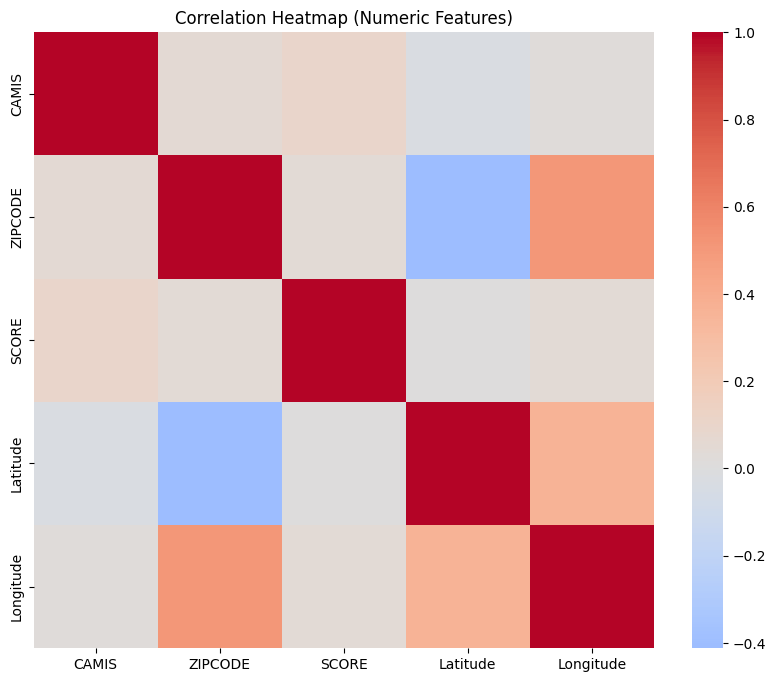

In [ ]:
# --- 8.1 Correlation Between Numerical Variables ---

# Calculate correlations between numerical columns
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    print("\nCorrelation Matrix:")
    print("(Values close to 1 or -1 mean strong relationship)")
    print("(Values close to 0 mean weak relationship)")
    display(corr)

    # Create a visual heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap="coolwarm", center=0, 
                square=True, linewidths=1)
    plt.title("Correlation Heatmap - How Numerical Variables Relate")
    plt.tight_layout()
    plt.show()
    
    print("\nNote: Positive values (red) mean variables increase together.")
    print("      Negative values (blue) mean one increases as the other decreases.")
else:
    print("\nNot enough numerical columns for correlation analysis.")
